https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('CCIHE2018.csv',encoding='latin-1')
print(df.columns)

Index(['UNITID', 'NAME', 'CITY', 'STABBR', 'CC2000', 'BASIC2005', 'BASIC2010',
       'BASIC2015', 'BASIC2018', 'IPUG2018',
       ...
       'Unnamed: 98', 'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101',
       'Unnamed: 102', 'Unnamed: 103', 'Unnamed: 104', 'Unnamed: 105',
       'Unnamed: 106', 'Unnamed: 107'],
      dtype='object', length=108)


In [2]:
df = df[df['BASIC2018'].isin([15,16,17])] #Doctoral
df = df[df['UNITID']!=185828] ##New Jersey Institute of Technology
df = df[df['UNITID']!=204857] ##Ohio University-Main Campus
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns=df.columns.str.replace('&','_')
df.columns=df.columns.str.replace(' ','')
df.fillna(0,inplace=True)
print(df.columns)
##& df['UNITID']!=185828]
##df.query('BASIC2018 ==[15,16,17] & UNITID!=185828')


Index(['UNITID', 'NAME', 'CITY', 'STABBR', 'CC2000', 'BASIC2005', 'BASIC2010',
       'BASIC2015', 'BASIC2018', 'IPUG2018', 'IPGRAD2018', 'ENRPROFILE2018',
       'UGPROFILE2018', 'SIZESET2018', 'CCE2015', 'OBEREG', 'SECTOR',
       'ICLEVEL', 'CONTROL', 'LOCALE', 'LANDGRNT', 'MEDICAL', 'HBCU', 'TRIBAL',
       'HSI', 'MSI', 'WOMENS', 'COPLAC', 'CUSU', 'CUMU', 'ASSOCDEG', 'BACCDEG',
       'MASTDEG', 'DOCRSDEG', 'DOCPPDEG', 'DOCOTHDEG', 'TOTDEG', 'S_ER_D',
       'NONS_ER_D', 'PDNFRSTAFF', 'FACNUM', 'HUM_RSD', 'SOCSC_RSD', 'STEM_RSD',
       'OTHER_RSD', 'DRSA_S', 'DRSPROF', 'OGRDA_S', 'OGRDPROF', 'A_SBADEG',
       'PROFBADEG', 'ASC1C2TRNS', 'ASC1C2CRTC', 'FALLENR16', 'ANENR1617',
       'FALLENR17', 'FALLFTE17', 'UGTENR17', 'GRTENR17', 'UGDSFTF17',
       'UGDSPTF17', 'UGNDFT17', 'UGNDPT17', 'GRFTF17', 'GRPTF17',
       'UGN1STTMFT17', 'UGN1STTMPT17', 'UGNTRFT17', 'UGNTRPT17', 'FAITHFLAG',
       'OTHSFFLAG', 'NUMCIP2', 'LRGSTCIP2', 'PCTLRGST', 'UGCIP4PR', 'GRCIP4PR',
       'COEXPR'

In [3]:
df=df.replace(to_replace='.*NotIn/*',value='', regex=True)
df=df.replace(to_replace='.*Notin/*',value='', regex=True)
#df.S_ER_D[df['UNITID']==185828]

In [66]:
df['S_ER_D']=df['S_ER_D'].astype(int)
df['NONS_ER_D']=df['NONS_ER_D'].astype(int)
df['PDNFRSTAFF']=df['PDNFRSTAFF'].astype(int)
df['FACNUM']=df['FACNUM'].astype(int)
df['SOCSC_RSD']=df['SOCSC_RSD'].astype(int)
df['STEM_RSD']=df['STEM_RSD'].astype(int)
df['HUM_RSD']=df['HUM_RSD'].astype(int)

df.fillna(0,inplace=True)
##df['HUM_RSD'].head(10)

In [67]:
def division(n,d):
    try:
        return n/d
    except ZeroDivisionError:
        return 0

##df['Per_Cap_SE_Exp']=df.S_ER_D/df.FACNUM
##df['Per_Cap_Non_SE']=df.NONS_ER_D/df.FACNUM
##df['Per_Cap_Prof_Staf']=df.PDNFRSTAFF/df.FACNUM

df['Per_Cap_SE_Exp']=division(df['S_ER_D'],df['FACNUM'])
df['Per_Cap_Non_SE']=division(df['NONS_ER_D'],df['FACNUM'])
df['Per_Cap_Prof_Staf']=division(df['PDNFRSTAFF'],df['FACNUM'])

df.fillna(0,inplace=True)

aggregate=['HUM_RSD','NONS_ER_D','OTHER_RSD','PDNFRSTAFF','S_ER_D','SOCSC_RSD','STEM_RSD']
perCapita=['Per_Cap_SE_Exp','Per_Cap_Non_SE','Per_Cap_Prof_Staf']

In [68]:
from sklearn.preprocessing import StandardScaler

#Normalization
features = df[perCapita]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[perCapita] = features


#Normalization
features = df[aggregate]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[aggregate] = features





In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df[['HUM_RSD','NONS_ER_D','OTHER_RSD','PDNFRSTAFF','S_ER_D','SOCSC_RSD','STEM_RSD']])
##principalDf = pd.DataFrame(data = principalComponents
             #,columns = ['principal component 1'])
df.insert(0,'PrincipalComponents1',principalComponents)

In [70]:
pca = PCA(n_components=1)
principalComponents1 = pca.fit_transform(df[['Per_Cap_SE_Exp','Per_Cap_Non_SE','Per_Cap_Prof_Staf']])
##principalDf2 = pd.DataFrame(data = principalComponents
             ##,columns = ['principal component 2'])
df.insert(0,'PrincipalComponents2',principalComponents1)

In [75]:
from scipy.stats import zscore
df['PrincipalComponents1']=zscore(df['PrincipalComponents1'])
df['PrincipalComponents2']=zscore(df['PrincipalComponents2'])


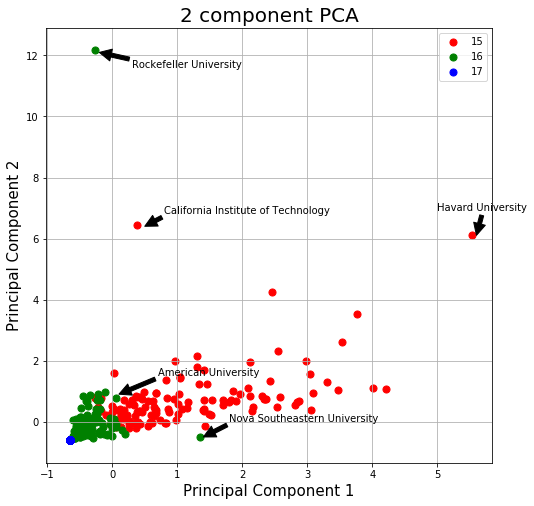

In [87]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
##ax.set_xlim([0, 10])

ax.set_ylabel('Principal Component 2', fontsize = 15)
##ax.set_ylim([0, 10])

ax.set_title('2 component PCA', fontsize = 20)
targets = [15, 16, 17]
colors = ['r', 'g', 'b']


for target, color in zip(targets,colors):
    indicesToKeep = df['BASIC2018'] == target
    x=df.loc[indicesToKeep, 'PrincipalComponents1']
    y=df.loc[indicesToKeep, 'PrincipalComponents2']
   # t=df.loc[indicesToKeep, 'NAME']
    
    ax.scatter(x, y, c = color, s = 50)
    #ax.text(x,y)#,t)


ax.annotate('Nova Southeastern University', xy=(1.4, -.5), xytext=(1.8, 0),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )    
ax.annotate('California Institute of Technology', xy=(0.5, 6.4), xytext=(0.8, 6.8),
            arrowprops=dict(facecolor='black', shrink=0.01),
            ) 
ax.annotate('Rockefeller University', xy=(-0.2, 12.1), xytext=(0.3, 11.6),
            arrowprops=dict(facecolor='black', shrink=0.01),
            ) 
ax.annotate('Havard University', xy=(5.6, 6.1), xytext=(5, 6.9),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )  
ax.annotate('American University', xy=(0.1, 0.9), xytext=(0.7, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )   
#theta = np.arange(0, np.pi / 2, 0.01)
#ax.plot(0.6 * np.cos(theta), 0.6 * np.sin(theta))

ax.legend(targets)
ax.grid()

In [17]:
df['PrincipalComponents1'].describe()

count    4.160000e+02
mean    -2.496667e-16
std      2.231866e+00
min     -1.448419e+00
25%     -1.448419e+00
50%     -1.006169e+00
75%      4.683128e-01
max      1.231703e+01
Name: PrincipalComponents1, dtype: float64

C:\Users\wei-hsuan.tsui\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


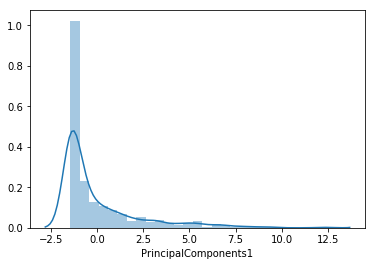

In [16]:
import seaborn as sns
sns.distplot(df['PrincipalComponents1'])

In [74]:
df.query(' PrincipalComponents1<2 and PrincipalComponents1>0 and PrincipalComponents2>1 and BASIC2018==16')

,PrincipalComponents2,PrincipalComponents1,UNITID,NAME,CITY,STABBR,CC2000,BASIC2005,BASIC2010,BASIC2015,...,NSATACT,SATV25,SATM25,SATCMB25,SATACTEQ25,ACTCMP25,ACTFINAL,Per_Cap_SE_Exp,Per_Cap_Non_SE,Per_Cap_Prof_Staf
118,1.136391,0.128097,131159,American University,Washington,DC,15,17,17,16,...,1574,610,570,1180,24,26,25,-0.29366,3.717989,-0.373638
